**McDonald's Case Study : Fast Food**

In [158]:
import pandas as pd

**Key Characteristics of the Data Set**

In [159]:
mcdonalds = pd.read_csv("/content/mcdonalds.csv")
column_names = mcdonalds.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


**Size of the Data Set**

In [160]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


**Some Rows of the Data Set**

In [161]:
head_data = mcdonalds.head(3)
print(head_data)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


**Checking Null Value and Data Type**

In [162]:
mcdonalds.shape
mcdonalds.head()
mcdonalds.dtypes
mcdonalds.info()
mcdonalds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

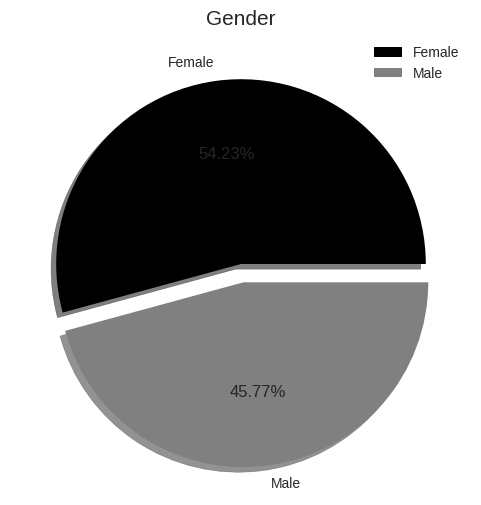

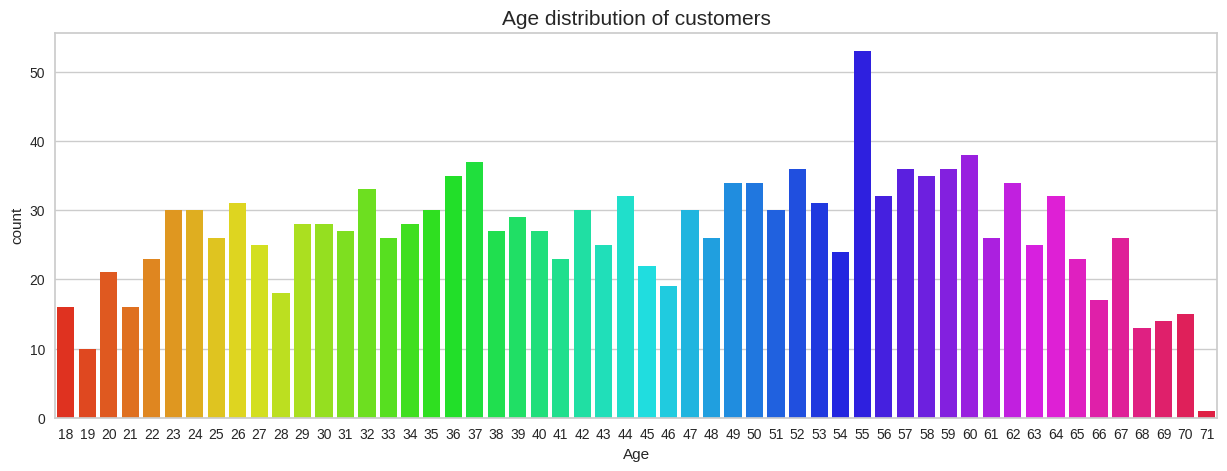

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender
plt.figure(figsize=(6, 6))
plt.pie(mcdonalds['Gender'].value_counts(), colors=['black', 'gray'], explode=[0, 0.1], labels=['Female', 'Male'], shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()

# Age
plt.figure(figsize=(15, 5))
sns.countplot(x=mcdonalds['Age'], palette='hsv')
plt.title('Age distribution of customers', fontsize=15)
plt.show()




**Histogram of the variables**

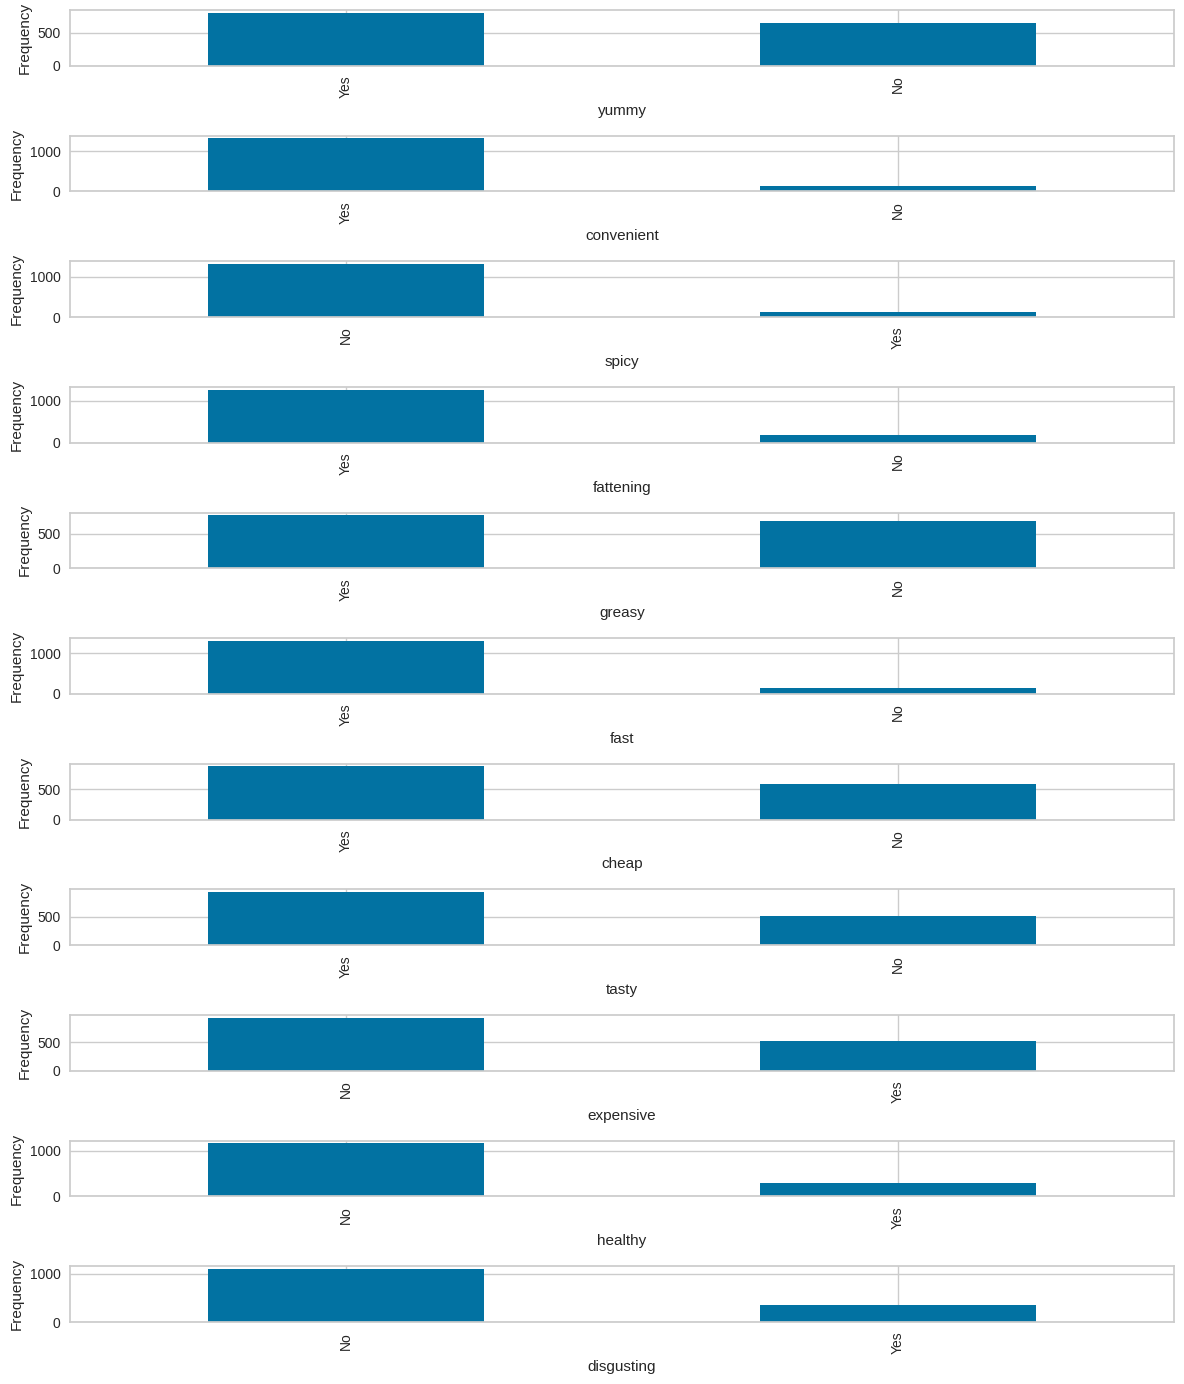

In [164]:
import pandas as pd
#import matplotlib.pyplot as plt

# Select the first 11 categorical attributes
selected_cols = mcdonalds.columns[:11]
df_selected = mcdonalds[selected_cols]

# Plot bar chart for each attribute
plt.rcParams['figure.figsize'] = (12, 14)
fig, axes = plt.subplots(len(selected_cols), 1)
for i, col in enumerate(selected_cols):
    df_selected[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [165]:
import numpy as np

**Calculating Column Means after converting them into numeric value**

In [166]:
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = np.where(MD_x == "Yes", 1, 0)

# Define the column names
column_names = ["yummy", "convenient", "spicy", "fattening", "greasy",
                "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Calculate the column means and round to 2 decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

# Print the column names and means
for name, mean in zip(column_names, column_means):
    print(f"{name}\n{mean}")

yummy
0.55
convenient
0.91
spicy
0.09
fattening
0.87
greasy
0.53
fast
0.9
cheap
0.6
tasty
0.64
expensive
0.36
healthy
0.2
disgusting
0.24


**Applying Principal Component Analysis**

In [167]:
from sklearn.decomposition import PCA

In [168]:
# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print the summary
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(explained_variance_ratio)

print("Importance of components:")
print(" ".join(component_names))
print("Standard deviation", " ".join([f"{std:.5f}" for std in np.sqrt(explained_variance)]))
print("Proportion of Variance", " ".join([f"{prop:.5f}" for prop in explained_variance_ratio]))
print("Cumulative Proportion", " ".join([f"{cum:.5f}" for cum in cumulative_proportion]))


Importance of components:
PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11
Standard deviation 0.75705 0.60746 0.50462 0.39880 0.33741 0.31027 0.28970 0.27512 0.26525 0.24884 0.23690
Proportion of Variance 0.29945 0.19280 0.13305 0.08310 0.05948 0.05030 0.04385 0.03955 0.03676 0.03235 0.02932
Cumulative Proportion 0.29945 0.49224 0.62529 0.70839 0.76787 0.81817 0.86201 0.90156 0.93832 0.97068 1.00000


**Calculating correlation coefficient**

In [169]:
# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(pca.singular_values_.round(1))

# Print the rotation
print("Rotation (n x k) = (11 x 11):")
rotation_df = pd.DataFrame(pca.components_, columns=mcdonalds.columns[:11])
rotation_df.columns = [f"PC{i+1}" for i in range(pca.n_components_)]
print(rotation_df.round(3))


Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
0  -0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214   
1   0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077   
2  -0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192   
3   0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763   
4  -0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288   
5   0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178   
6  -0.281 -0.060  0.708 -0.386  0.036 -0.087 -0.040  0.360 -0.068 -0.350   
7   0.013 -0.113  0.376  0.590 -0.138 -0.628  0.140 -0.073  0.030  0.176   
8   0.572 -0.018  0.400 -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186   
9  -0.110 -0.666 -0.076 -0.005  0.009  0.240  0.428  0.079  0.454 -0.038   
10  0.045 -0.542  0.142  0.251  0.002  0.3

**The following commands rotate and
project consumers (in grey) into the first two principal components, plot them and
add the rotated and projected original segmentation variables**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


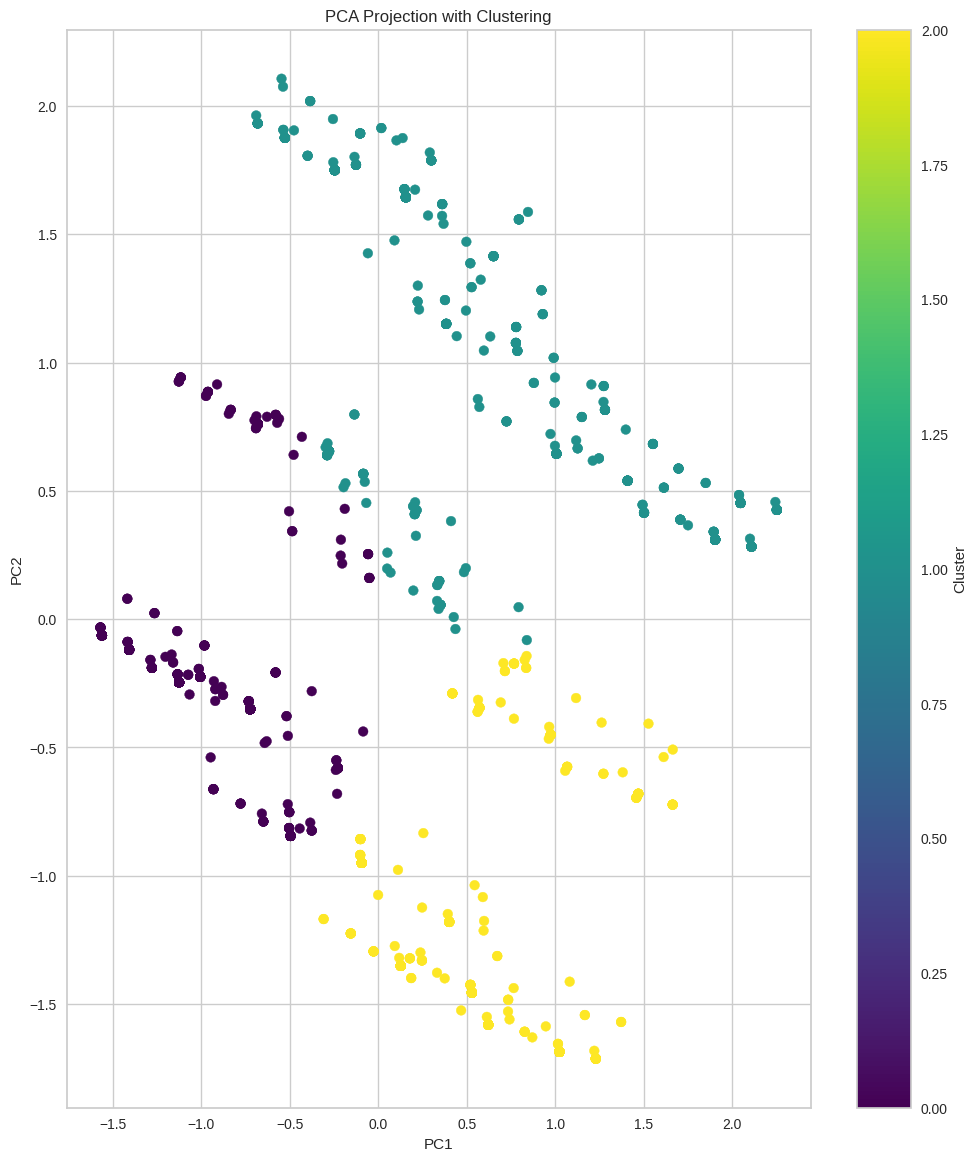

In [170]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Standardize the data
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(MD_pca)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(MD_scaled)

# Plot the results
plt.scatter(MD_scaled[:, 0], MD_scaled[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Clustering")
plt.colorbar(label="Cluster")
plt.show()


**Convertion of the Categorical Value into Numerical Value by Label Encoder**

**First 11 Columns are converted into Numerical Columns**

In [171]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

**Applying K-Means Clustering with Elbow Visualizer**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

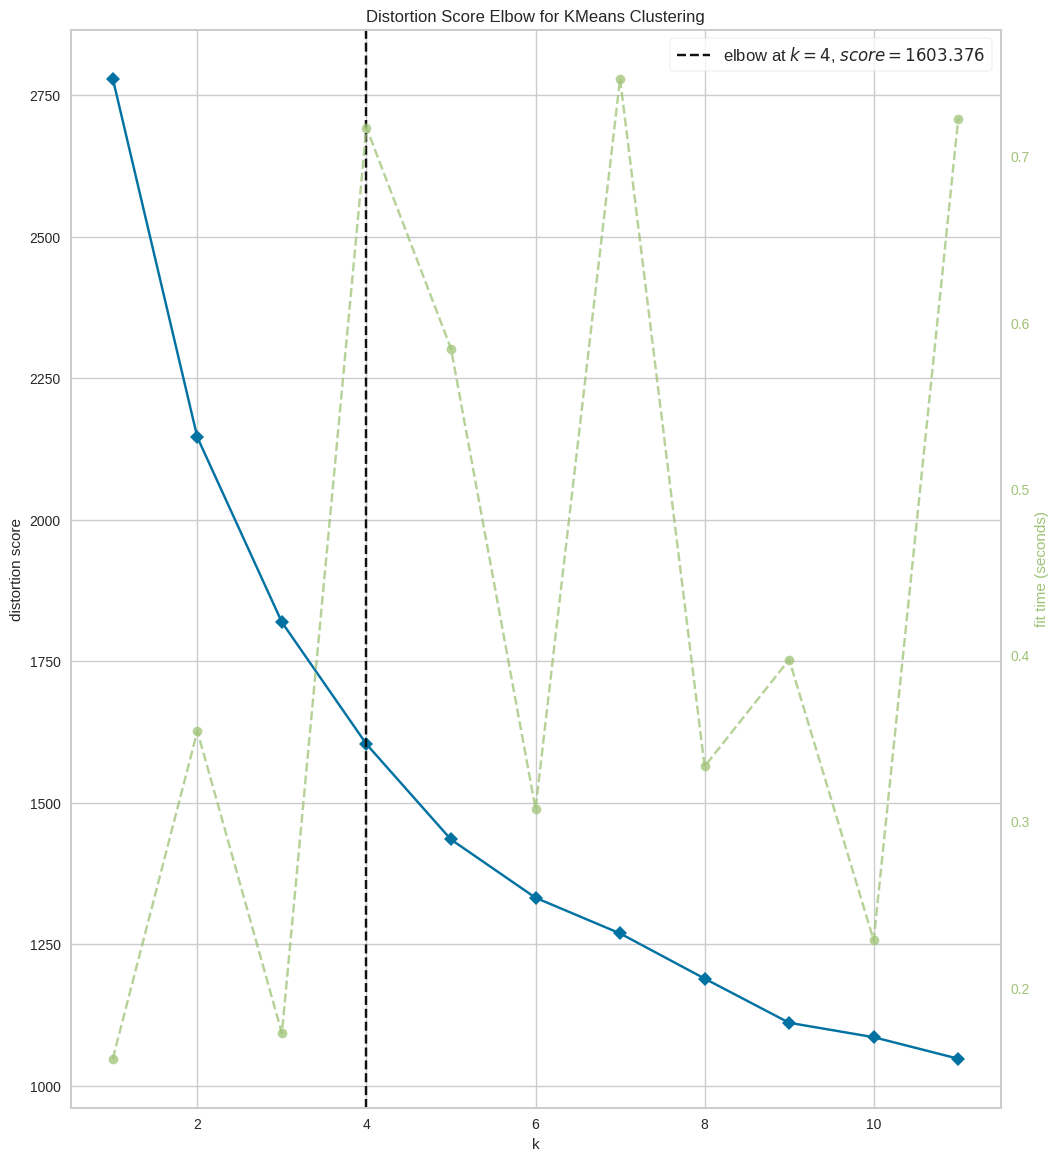

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

df_eleven = mcdonalds.loc[:,cat]
df_eleven
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

**Centroids of each cluster**

In [173]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
mcdonalds['cluster'] = kmeans.labels_
print (kmeans.labels_)
print (kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [174]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

**Graphical Representation of Clusters**

**Converting the 'Like' column into numeric column**

In [175]:
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

<ipython-input-176-124669ff9e78>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=mcdonalds,


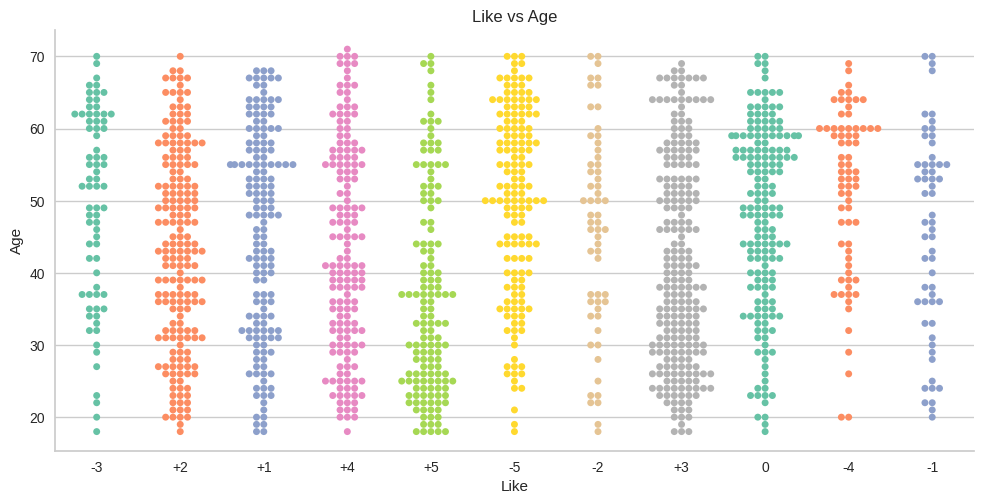

In [176]:
sns.catplot(x="Like", y="Age",data=mcdonalds,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Like vs Age')
plt.show()

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


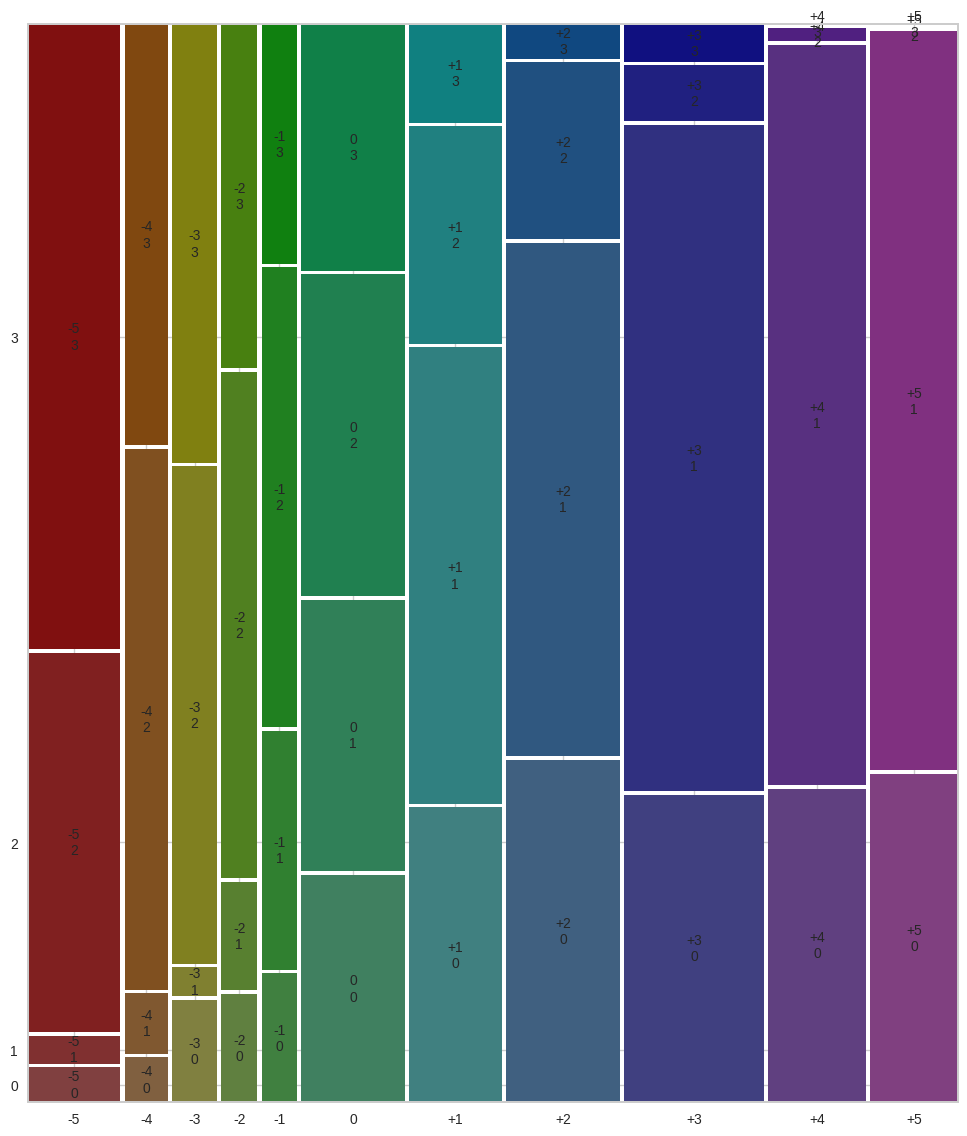

In [177]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab = pd.crosstab(mcdonalds['cluster'], mcdonalds['Like'])
desired_columns = ['-5','-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4','+5']
crosstab = crosstab.reindex(columns=desired_columns)

# Generate mosaic plot
mosaic(crosstab.unstack())
crosstab

**Number of Male and Female in each Cluster**

In [178]:
crosstab_gender =pd.crosstab(mcdonalds['cluster'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster,,
0,154,169
1,349,231
2,179,125
3,106,140


**Age vs Cluster**

<Axes: xlabel='cluster', ylabel='Age'>

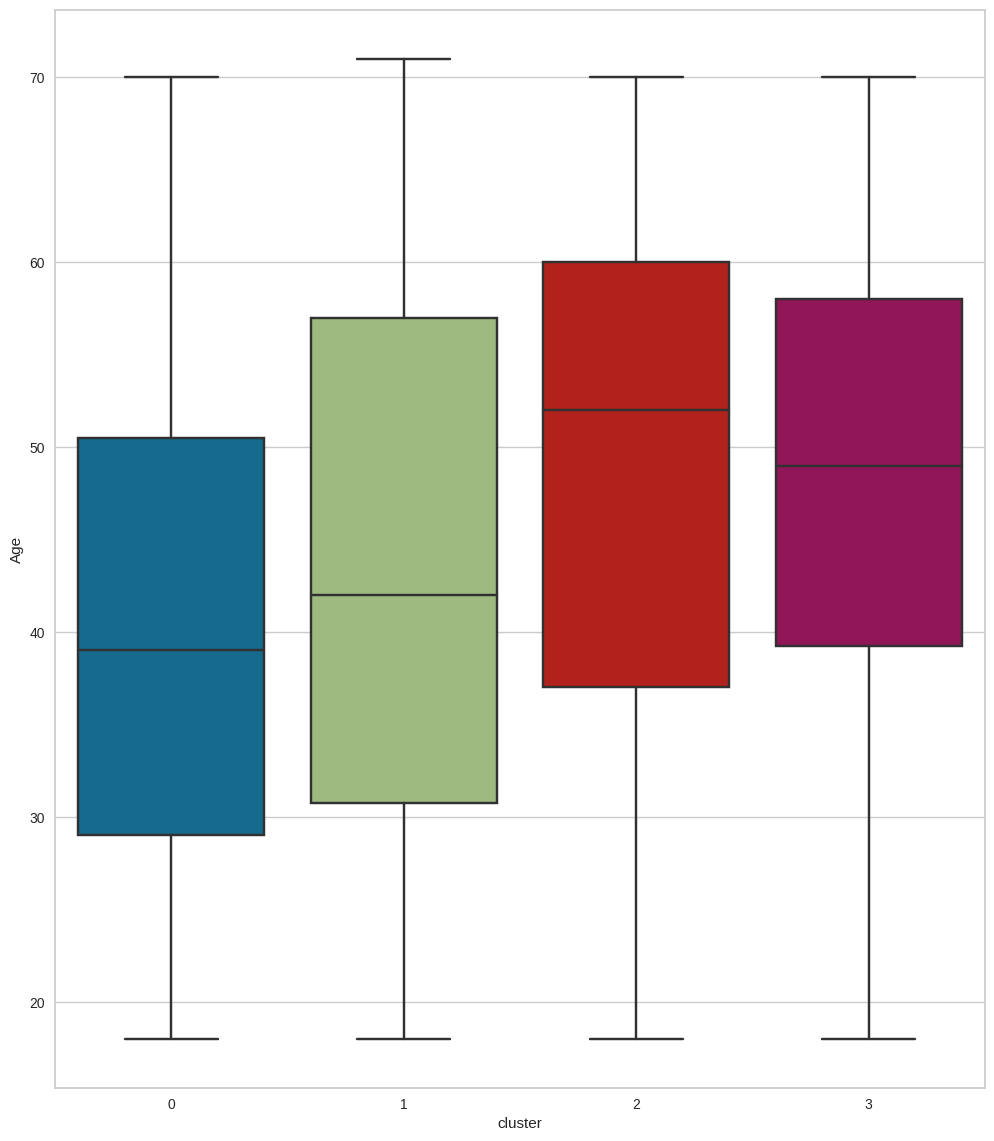

In [179]:
sns.boxplot(x="cluster", y="Age", data=mcdonalds)